<a href="https://colab.research.google.com/github/senmuthiya/CityofProvidence/blob/main/CityOfProvidence_Taxroll_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analysis of City of Providence**
**Rhode Island - Tax roll assessment dataset of 2023**

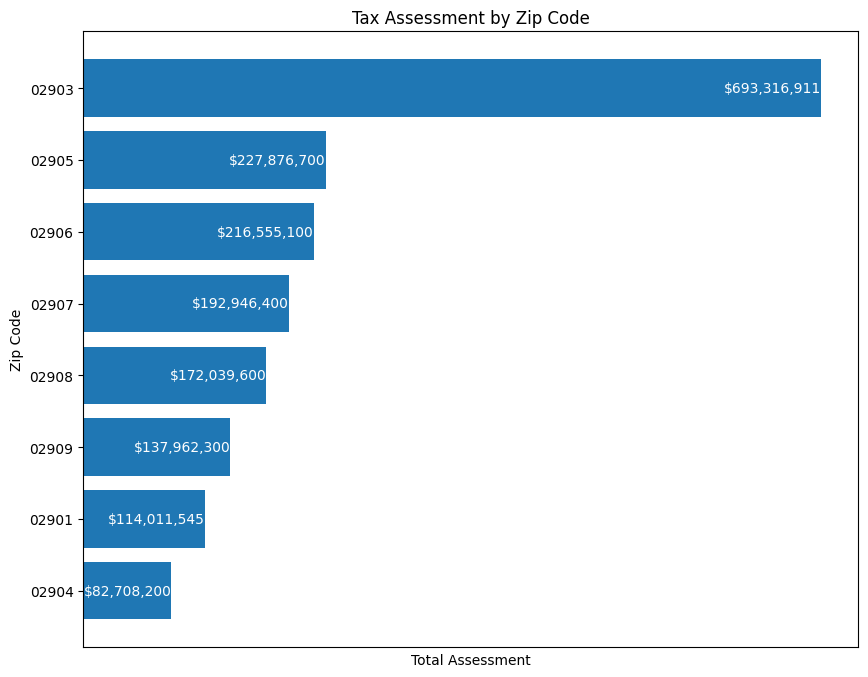

In [ ]:
# IMPORT PANDAS, MATPLOTLIB
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Call the API, read the JSON File and Create a DataFrame
df = pd.read_json("https://data.providenceri.gov/resource/fd8d-n74v.json")

# Step 1: Split Zip values based on '-'
df['zip_postal'] = df['zip_postal'].str.split('-').str[0]

# Step 2: Convert Total Assessment to numeric (if it's not already)
df['total_assmt'] = pd.to_numeric(df['total_assmt'], errors='coerce')

# Step 3: Group by unique Zip and sum Total Assessment
grouped_df = df.groupby('zip_postal')['total_assmt'].sum().reset_index()

# Step 4: Sort by descending order of Total Assessment
grouped_df = grouped_df.sort_values(by='total_assmt', ascending=True)

# Step 5: Plot using horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(grouped_df['zip_postal'], grouped_df['total_assmt'])
plt.xlabel('Total Assessment')
plt.ylabel('Zip Code')
plt.title('Tax Assessment by Zip Code')

# Step 6: Display Total Assessment values on the bars with $ prefix and no decimals
for bar, value in zip(bars, grouped_df['total_assmt']):
    plt.text(value, bar.get_y() + bar.get_height() / 2, f'${int(value):,}', ha='right', va='center', color='white')

# Step 7: Remove x-axis values
plt.xticks([])

plt.show()


In [ ]:
print(df.dtypes)

p_id                   int64
tax_map               object
plat                   int64
lot                    int64
unit                  object
class                  int64
short_desc            object
levy_code_1           object
short_desc_1          object
civic                float64
street                object
suffix                object
formated_address      object
city                  object
zip_postal            object
first_name            object
last_name             object
free_line_2           object
civic_1               object
street_1              object
s_suffix              object
city_1                object
state                 object
zip_postal_1          object
total_assmt            int64
total_exempt         float64
total_taxes          float64
geolocation           object
owner_geolocation     object
company               object
unit_1                object
dtype: object


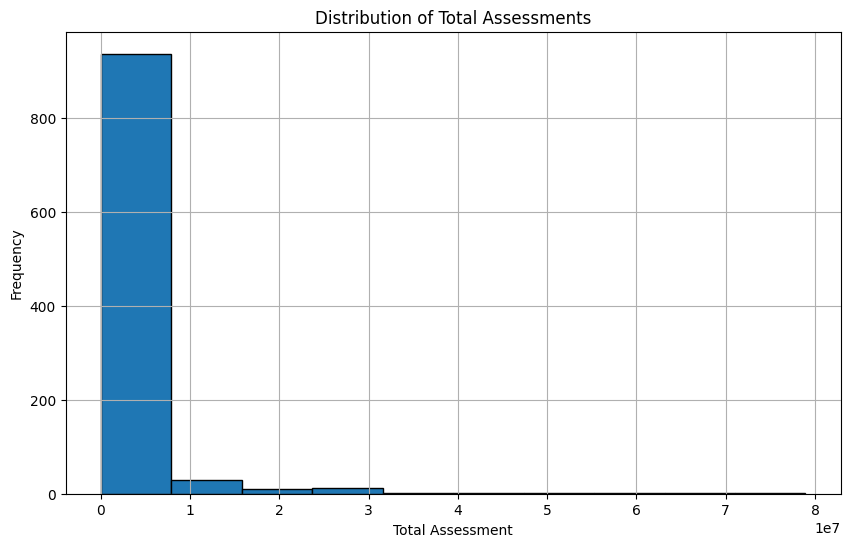


Property with the Highest Assessment:
p_id                                                             31485
tax_map                                                  082-0283-0000
plat                                                                82
lot                                                                283
unit                                                              0000
class                                                               83
short_desc                                                  44-3-9 Stb
levy_code_1                                                        TSA
short_desc_1                                                       TSA
civic                                                            825.0
street                                                      Chalkstone
suffix                                                             Ave
formated_address                                    825 Chalkstone Ave
city                                  

In [ ]:
# Assuming you have your data loaded in a variable named 'data'
# You can extract the relevant column for analysis
assessments = df['total_assmt'].astype(float)

# Plot a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(assessments, bins=10, edgecolor='black')
plt.title('Distribution of Total Assessments')
plt.xlabel('Total Assessment')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Identify properties with the highest and lowest assessments
highest_assessment_property = df.loc[df['total_assmt'].idxmax()]
lowest_assessment_property = df.loc[df['total_assmt'].idxmin()]

print("\nProperty with the Highest Assessment:")
print(highest_assessment_property)

print("\nProperty with the Lowest Assessment:")
print(lowest_assessment_property)

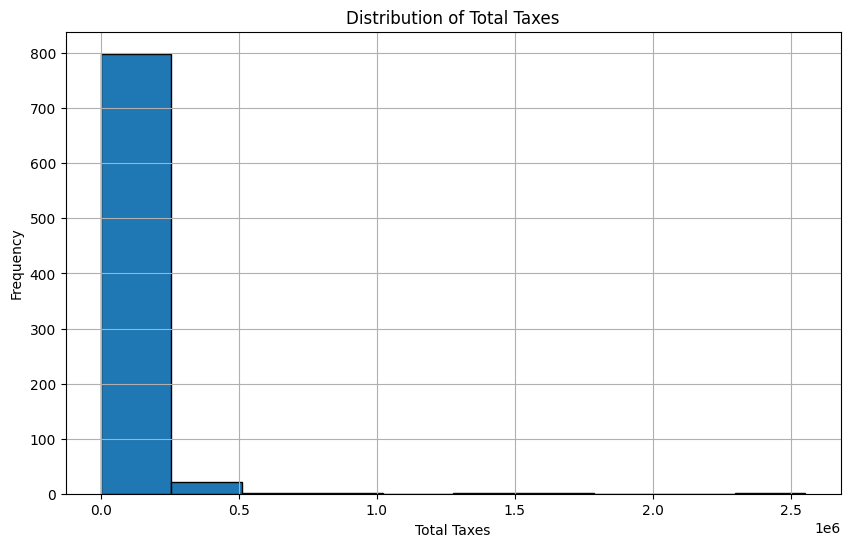


Property Contributing the Most to Tax Revenue:
p_id                                                                   31485
tax_map                                                        082-0283-0000
plat                                                                      82
lot                                                                      283
unit                                                                    0000
class                                                                     83
short_desc                                                        44-3-9 Stb
levy_code_1                                                              TSA
short_desc_1                                                             TSA
civic                                                                  825.0
street                                                            Chalkstone
suffix                                                                   Ave
formated_address            

In [ ]:

# import seaborn as sns

# Assuming you have your data loaded in a variable named 'data'
# You can extract the relevant columns for analysis
total_taxes = df['total_taxes'].astype(float)
total_assessments = df['total_assmt'].astype(float)

# Plot a histogram to visualize the distribution of total taxes
plt.figure(figsize=(10, 6))
plt.hist(total_taxes, bins=10, edgecolor='black')
plt.title('Distribution of Total Taxes')
plt.xlabel('Total Taxes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Identify properties contributing the most to tax revenue
highest_tax_property = df.loc[df['total_taxes'].idxmax()]

print("\nProperty Contributing the Most to Tax Revenue:")
print(highest_tax_property)

# Calculate the ratio of total taxes to total assessments
tax_to_assessment_ratio = total_taxes / total_assessments

# Add the calculated ratio as a new column in the DataFrame
df['tax_to_assessment_ratio'] = tax_to_assessment_ratio

# Display the DataFrame with the new ratio column
print("\nDataFrame with Tax-to-Assessment Ratio:")
print(df[['total_taxes', 'total_assmt', 'tax_to_assessment_ratio']])
